## SVD Image Compression Demo

### Step 1: Load and Display the Original Image

C:\Users\c\AppData\Local\Temp\ipykernel_1964\2927547500.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('stevejobs.jpeg')


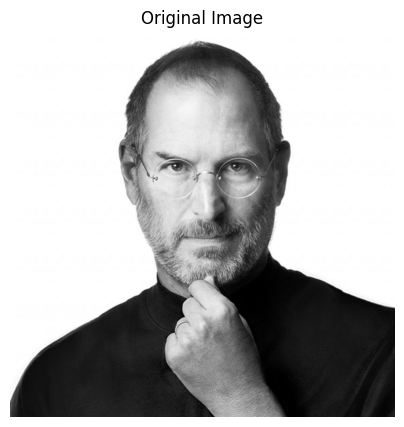

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imwrite
from ipywidgets import widgets, fixed
from IPython.display import display
from skimage.color import rgb2gray
import os

# Load grayscale Lena image from URL
image = imread('stevejobs.jpeg')

# Convert RGB image to grayscale if needed
if image.ndim == 3:
    image = rgb2gray(image)  # Returns float image in [0, 1]
    image = (image * 255).astype(np.uint8)  # Convert to uint8 if needed

# Show original image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Step 2: Perform Singular Value Decomposition (SVD)

U shape: (1024, 1024), S shape: (1024,), VT shape: (1024, 1024)


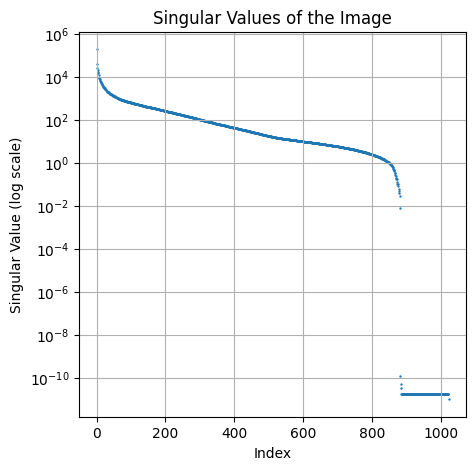

In [2]:
# Decompose the image matrix using SVD
U, S, VT = np.linalg.svd(image, full_matrices=False)
print(f"U shape: {U.shape}, S shape: {S.shape}, VT shape: {VT.shape}")

# Plot singular values on a log scale
plt.figure(figsize=(5, 5))
plt.scatter(np.arange(len(S)), S, s=0.5)
plt.yscale('log')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')
plt.title('Singular Values of the Image')
plt.grid(True)
plt.show()

### Step 3: Core Compression Utilities

In [3]:
def svd_compress(u, s, vt, k):
    """
    Return the compressed image using top-k SVD components.
        """
    u_k = u[:, :k]
    s_k = s[:k]
    vt_k = vt[:k, :]
    
    # TODO: Replace the line below with the actual reconstruction
    s_k = np.diag(s[:k])
    compressed = np.dot(u_k, np.dot(s_k, vt_k))
    return compressed

def compression_ratio(u, s, vt, k, original_shape):
    """
    Compute the compression ratio for rank-k approximation.
    """
    original_size = original_shape[0] * original_shape[1]
    
    # TODO: Replace the line below
    compressed_size = k * (original_shape[0] + original_shape[1] + 1)
    ratio = original_size / compressed_size
    return ratio

### Step 4: Interactive Compression with Rank-k Approximation


In [4]:
# Create interactive slider to choose rank-k
k_slider = widgets.IntSlider(min=1, max=min(image.shape), step=5, value=20, description='Rank k:')
display(k_slider)

# Define the approximation and visualization function
def approximate(k, u, s, vt, image):
    compressed = svd_compress(u, s, vt, k)
    if compressed is None:
        print("Please implement svd_compress().")
        return

    compressed = np.clip(compressed, 0, 255)
    diff = image - compressed
    error = np.linalg.norm(diff)
    ratio = compression_ratio(u, s, vt, k, image.shape)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(compressed, cmap='gray')
    ax1.set_title(f'Compressed Image (k={k})')
    ax1.axis('off')

    ax2.imshow(image, cmap='gray')
    ax2.set_title('Original Image')
    ax2.axis('off')

    plt.suptitle(f'Compression Ratio = {ratio:.2f}, Reconstruction Error = {error:.2f}', fontsize=10)
    plt.tight_layout()
    plt.show()

# Create the interactive widget
widgets.interact(approximate, k=k_slider, u=fixed(U), s=fixed(S), vt=fixed(VT), image=fixed(image))

IntSlider(value=20, description='Rank k:', max=1024, min=1, step=5)

interactive(children=(IntSlider(value=20, description='Rank k:', max=1024, min=1, step=5), Output()), _dom_cla…

<function __main__.approximate(k, u, s, vt, image)>

### Step 5: Save the Compressed Images with Different k

In [7]:
def save_compressed_image(k, u, s, vt, filename):
    compressed = svd_compress(u, s, vt, k)
    if compressed is None:
        print(f"Cannot save image for k={k}. svd_compress() not implemented.")
        return
    compressed = np.clip(compressed, 0, 255).astype(np.uint8)
    imwrite(filename, compressed)

H, W = image.shape
# TODO: Replace this with the value you computed in (b).
k_star = max(k for k in range(1, min(H, W)) if k * (H + W + 1) < H * W)
print(f"k_star: {k_star}")

k_values = [5, 20, 50, 100, k_star]

os.makedirs("compressed", exist_ok=True)
imwrite("compressed/original.jpg", image)

for k in k_values:
    filename = f"compressed/compressed_k{k:03d}.jpg"
    save_compressed_image(k, U, S, VT, filename)
    print(f"Saved compressed image for k={k} to {filename}")

k_star: 511
Saved compressed image for k=5 to compressed/compressed_k005.jpg
Saved compressed image for k=20 to compressed/compressed_k020.jpg
Saved compressed image for k=50 to compressed/compressed_k050.jpg
Saved compressed image for k=100 to compressed/compressed_k100.jpg
Saved compressed image for k=511 to compressed/compressed_k511.jpg


### Step 6: Compare File Sizes, Compression Ratios, and Analyze Results

In [12]:
import os

# Compare file sizes of saved images
original_size = os.path.getsize("compressed/original.jpg")
print(f"Original Image Size: {original_size / 1024:.2f} KB")

for k in k_values:
    filename = f"compressed/compressed_k{k:03d}.jpg"
    compressed_size = os.path.getsize(filename)
    ratio = compression_ratio(U, S, VT, k, image.shape)
    print(f"Compressed Image (k={k}) Size: {compressed_size / 1024:.2f} KB, Compression Ratio: {ratio:.2f}")
    print(f"Real File Size ratio: {original_size/compressed_size:.2f}")


Original Image Size: 67.97 KB
Compressed Image (k=5) Size: 36.68 KB, Compression Ratio: 102.35
Real File Size ratio: 1.85
Compressed Image (k=20) Size: 44.75 KB, Compression Ratio: 25.59
Real File Size ratio: 1.52
Compressed Image (k=50) Size: 55.04 KB, Compression Ratio: 10.24
Real File Size ratio: 1.23
Compressed Image (k=100) Size: 66.59 KB, Compression Ratio: 5.12
Real File Size ratio: 1.02
Compressed Image (k=511) Size: 68.66 KB, Compression Ratio: 1.00
Real File Size ratio: 0.99
